# First three iterations of all the lattice types

In [2]:
from sierpinski import LatticeTypeC, LatticeTypeN, LatticeTypeV

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')  # style of plot

lat_dict = {1: LatticeTypeC, 2: LatticeTypeN, 3: LatticeTypeV}

In [3]:
def plot_three_iter(lat_type: int) -> None:
    itera = 3
    fig, ax = plt.subplots(nrows=1, ncols=itera, figsize=(15, 5))
    for k in range(itera):
        lat_obj = lat_dict[lat_type](k+1)
        # plot points
        ax[k].scatter(lat_obj.positions[:, 0], lat_obj.positions[:, 1], s=100)
        # plot lines joining neighbours
        for i in range(lat_obj.num_points):
            point_i = lat_obj.tree.data[i]
            for j in lat_obj.neighbours[i]:
                point_j = lat_obj.tree.data[j]
                ax[k].plot([point_i[0], point_j[0]], [point_i[1], point_j[1]], c='#B0B0B0', zorder=0)
        ax[k].set_xticks([])
        ax[k].set_yticks([])
        ax[k].set_aspect('equal')
        ax[k].set_title(f'Type {lat_obj.lat_type}\nG({lat_obj.iteration})')
    fig.tight_layout()
    plt.show()

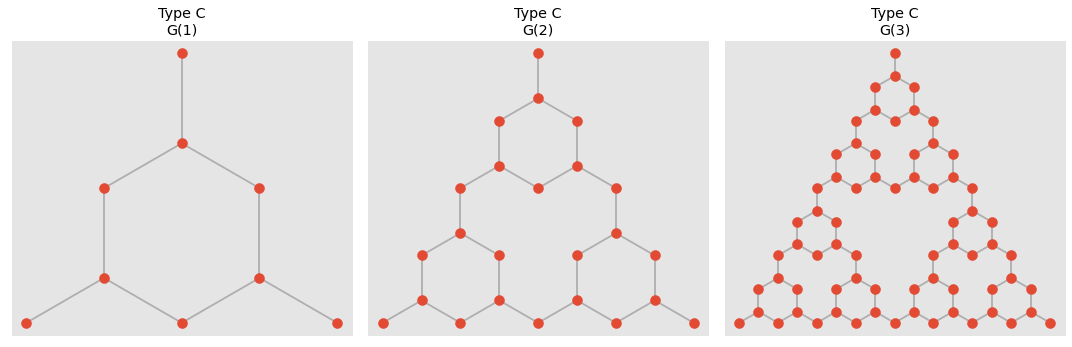

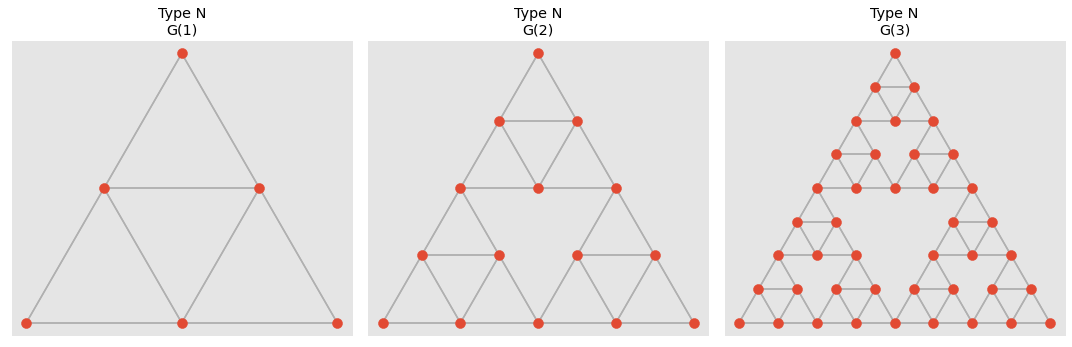

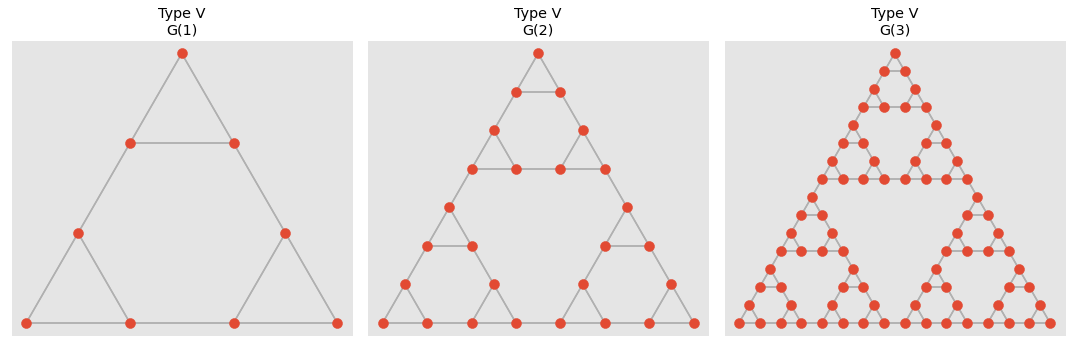

In [4]:
plot_three_iter(1)
plot_three_iter(2)
plot_three_iter(3)

# Dos and eigenstate for first three iterations for impure and defected lattices

In [5]:
from greens_function import GreensFunctionAnalysis
from eigenstates import LatticeEigenstates

In [6]:
def plot_lots_dos(lat_type: int, state: int, defects: bool) -> None:
    itera = 3
    ratios = [1]*(itera+1)
    ratios[-1] = 2
    fig, axs = plt.subplots(nrows=2, ncols=itera+1, figsize=(20, 10), gridspec_kw={'width_ratios': ratios, 'height_ratios': [1, 1]})
    gs = axs[1, 2].get_gridspec()
    # remove the underlying axes
    for ax in axs[:, -1]:
        ax.remove()
    axbig = fig.add_subplot(gs[:, -1])
    # loop over the iterations 
    for k in range(itera):
        if defects:
            obj = LatticeEigenstates(lat_type, k+1, frac_num_defects=0.2, eps_defect=1e2)
        else: 
            obj = LatticeEigenstates(lat_type, k+1)

        # plot eigenstate 

        flat_cells = [val for sublist in obj.lattice_obj.cells for val in sublist]
        positions_sorted = obj.lattice_obj.tree.data[flat_cells]
        renorm = 2000
        # impure lattice
        size = renorm*abs(obj.eigen_dict['dirty_vecs'][:, state])**2
        axs[0][k].scatter(positions_sorted[:, 0], positions_sorted[:, 1], s=size, c='k')
        axs[0][k].set_xticks([])
        axs[0][k].set_yticks([])
        axs[0][k].set_title(f' Eigenstate {state}/{obj.lattice_obj.num_points}')
        # plot the lines between neighbours
        for i in range(obj.lattice_obj.num_points):
            point_i = obj.lattice_obj.tree.data[i]
            for j in obj.lattice_obj.neighbours[i]:
                point_j = obj.lattice_obj.tree.data[j]
                axs[0][k].plot([point_i[0], point_j[0]], [point_i[1], point_j[1]], c='#B0B0B0', zorder=0)

        # plot dos

        _, dos = obj.get_RGF()
        ener_steps = GreensFunctionAnalysis.ENER_STEPS
        ener_arr = np.linspace(-3, 3, ener_steps)
        axs[1][k].plot(dos, ener_arr)

        # plot lattice 

        ms = 100
        axbig.scatter(obj.lattice_obj.positions[:, 0], obj.lattice_obj.positions[:, 1], s=ms)
        # plot lines joining neighbours
        for i in range(obj.lattice_obj.num_points):
            point_i = obj.lattice_obj.tree.data[i]
            for j in obj.lattice_obj.neighbours[i]:
                point_j = obj.lattice_obj.tree.data[j]
                axbig.plot([point_i[0], point_j[0]], [point_i[1], point_j[1]], c='#B0B0B0', zorder=0)
        # plot the defected sites in a different colour
        defect_points = obj.lattice_obj.positions[obj.lattice_obj.defect_idx]
        axbig.scatter(defect_points[:, 0], defect_points[:, 1], c='k', s=ms)
        axbig.set_xticks([])
        axbig.set_yticks([])
        axbig.set_aspect('equal')
        perc = obj.lattice_obj.frac_num_defects*100
        axs[0][k].set_aspect('equal')
    fig.subplots_adjust(wspace=0.1, hspace=0.0)
    perc = int(obj.lattice_obj.frac_num_defects*100)
    fig.suptitle(f'Type {obj.lattice_type} Lattice with {perc}% of Defects')
    if defects:
        plt.savefig(f'./figures/def_{obj.lattice_type}.png')
    else: 
        plt.savefig(f'./figures/pri_{obj.lattice_type}.png')
    plt.show()

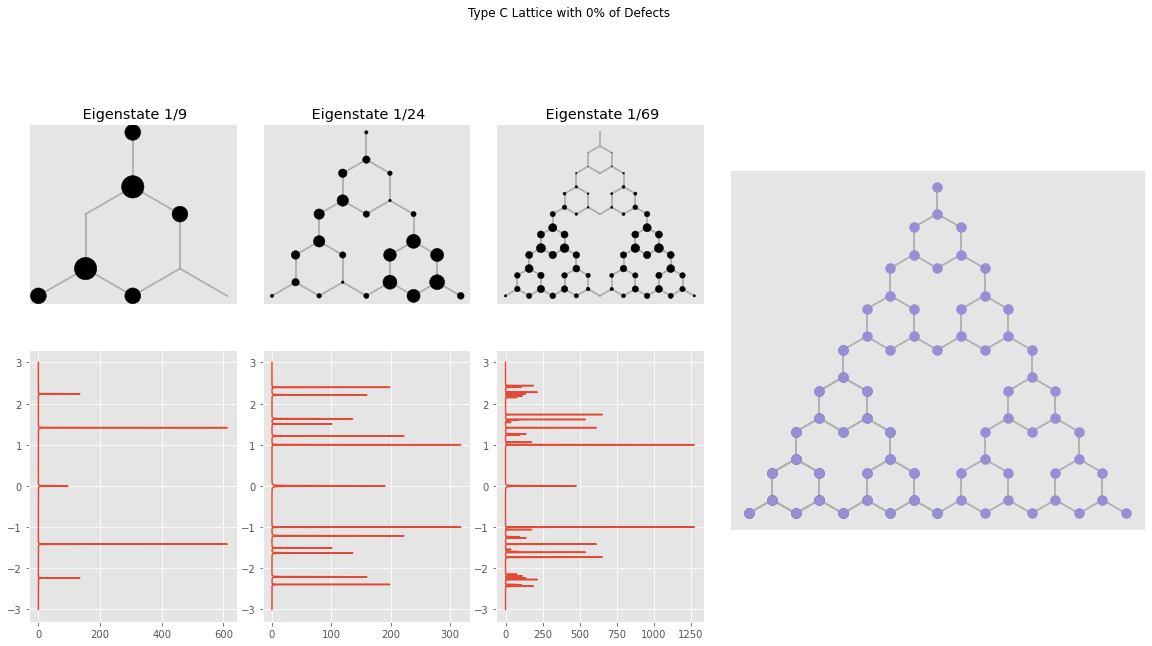

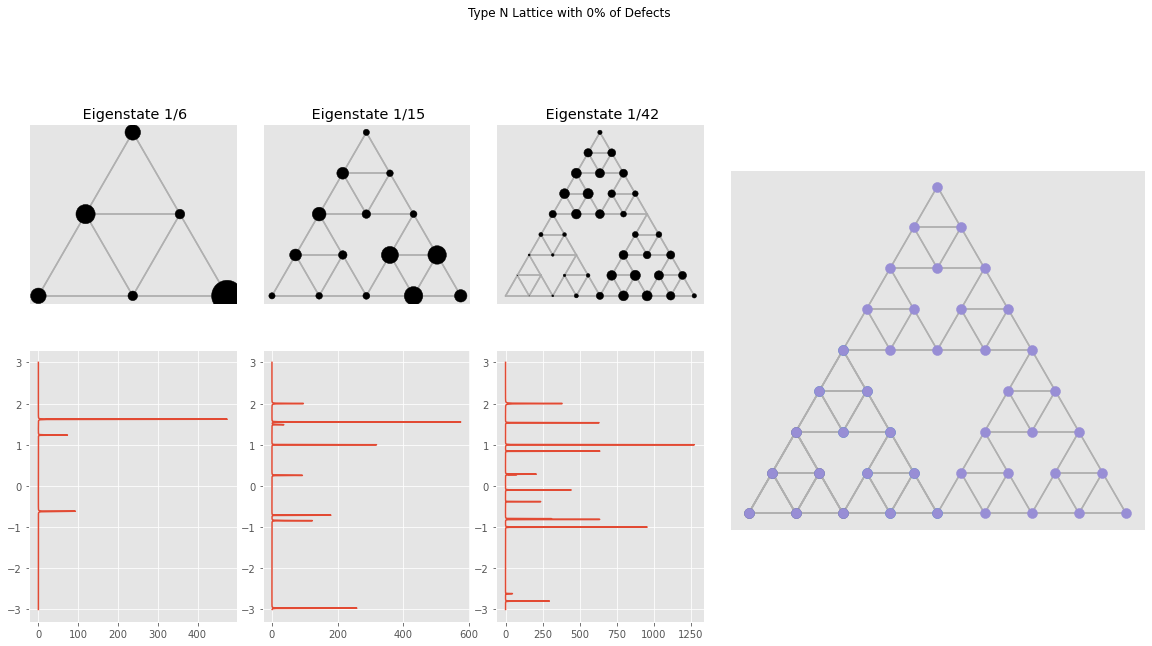

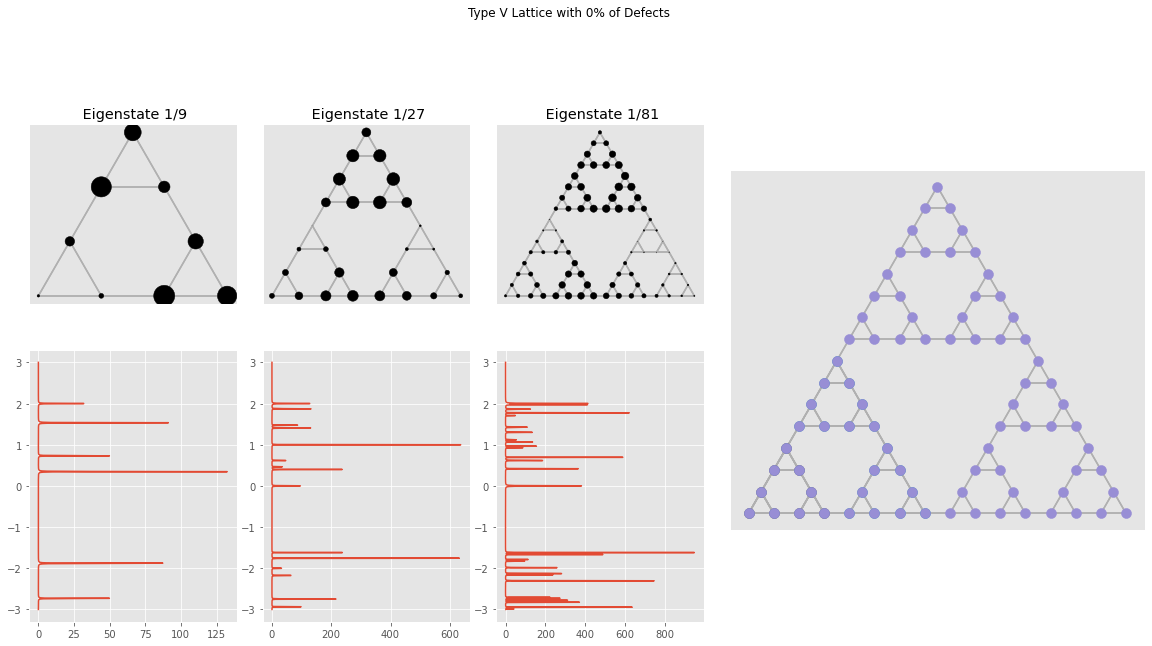

In [7]:
lat_type = 1
state = 1
defects = False
lat_dict = {1: 'C', 2: 'N', 3: 'V'}
for lat_type in range(1, 4):
    plot_lots_dos(lat_dict[lat_type], state, defects)
#plot_lots_dos(lat_dict[lat_type], state, defects)